<a href="https://colab.research.google.com/github/Tabatacsantos/Projetos_NLP/blob/main/Chat_IMDB_NLP_com_Naive_Bayes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>Análise de sentimentos do chat do IMDB</font>

O Processamento de linguagem natural ou NLP (sigla em inglês) é um ramo da inteligência artificial (IA) que permite aos computadores compreender, gerar e manipular a linguagem humana geralmente aplicada em: chatbots, Tradutores onlines, corretores ortográficos automáticos, chatbots, barra de pesquisa do Google, sumarização de textos, etc..


https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Conjunto de dados IMDB com 50.000 críticas de filmes para processamento de linguagem natural ou análise de texto.

Sobre o IMDB 
iMDb, também conhecida como Internet Movie Database (em Português: Base de Dados de Filmes na Internet), é uma base de dados online de informação sobre cinema[1] TV, música e games, hoje pertencente à Amazon.

<font color='Black'>Projeto

Com base nos dados históricos já classificados como negativo ou positivo, fazer um modelo que classifique frases.



In [ ]:
#Importação das bibliotecas
import numpy as np 
import pandas as pd 
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix

import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Visualização do DataFrame
data = pd.read_csv('/content/drive/MyDrive/Projetos_DC/NLP/IMDB-Dataset.csv')
print(data.shape)
data.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


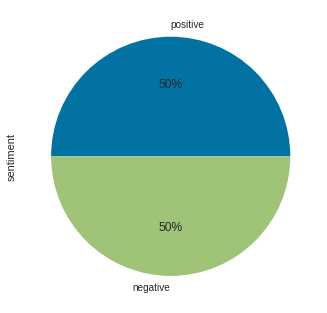

In [ ]:
# Porcentagem de cada categoria 
data.sentiment.value_counts().plot(kind='pie', autopct='%.f%%')

In [ ]:
# Remoção de tags para limpar o texto
def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)

data.review = data.review.transform(clean)
data.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

In [ ]:
# Remoção de caracteres especiais
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

data.review = data.review.apply(is_special)
data.review[0]

'One of the other reviewers has mentioned that after watching just 1 Oz episode you ll be hooked  They are right  as this is exactly what happened with me The first thing that struck me about Oz was its brutality and unflinching scenes of violence  which set in right from the word GO  Trust me  this is not a show for the faint hearted or timid  This show pulls no punches with regards to drugs  sex or violence  Its is hardcore  in the classic use of the word It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary  It focuses mainly on Emerald City  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  Em City is home to many  Aryans  Muslims  gangstas  Latinos  Christians  Italians  Irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away I would say the main appeal of the show is due to the fact that it goes where other shows wo

In [ ]:
# Coversão para letras minúsculas 
def to_lower(text):
    return text.lower()

data.review = data.review.apply(to_lower)
data.review[0]

'one of the other reviewers has mentioned that after watching just 1 oz episode you ll be hooked  they are right  as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go  trust me  this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs  sex or violence  its is hardcore  in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wo

In [ ]:
# Remoção de stopwords - como os conectivos “que”, “o”, “a”, “de”
import nltk
nltk.download('stopwords')
nltk.download('punkt')

def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

data.review = data.review.apply(rem_stopwords)
data.review[0]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['one',
 'reviewers',
 'mentioned',
 'watching',
 '1',
 'oz',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'word',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focuses',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'many',
 'aryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'away',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'goes',
 'shows',
 'da

In [ ]:
# Stemming - reduzir as palavras à sua forma raiz de uma forma que o ruído do texto seja diminuído 
def stem_txt(text):
    ss = SnowballStemmer('english') #tem portugues também
    return " ".join([ss.stem(w) for w in text])

data.review = data.review.apply(stem_txt)
data.review[0]

'one review mention watch 1 oz episod hook right exact happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus main emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darker side'

In [ ]:
# Filtragem da categoria positive
pos_tweets = data[data.sentiment == "positive"]
pos_tweets.head(10)

,review,sentiment
0,one review mention watch 1 oz episod hook righ...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
4,petter mattei love time money visual stun film...,positive
5,probabl time favorit movi stori selfless sacri...,positive
6,sure would like see resurrect date seahunt ser...,positive
9,like origin gut wrench laughter like movi youn...,positive
14,fantast movi three prison becom famous one act...,positive
16,film simpli remad one bad film fail captur fla...,positive
18,rememb film first film watch cinema pictur dar...,positive


In [ ]:
# Filtragem da categoria negative
neg_tweets = data[data.sentiment == "negative"]
neg_tweets.head()

,review,sentiment
3,basic famili littl boy jake think zombi closet...,negative
7,show amaz fresh innov idea 70 first air first ...,negative
8,encourag posit comment film look forward watch...,negative
10,phil alien one quirki film humour base around ...,negative
11,saw movi 12 came recal scariest scene big bird...,negative


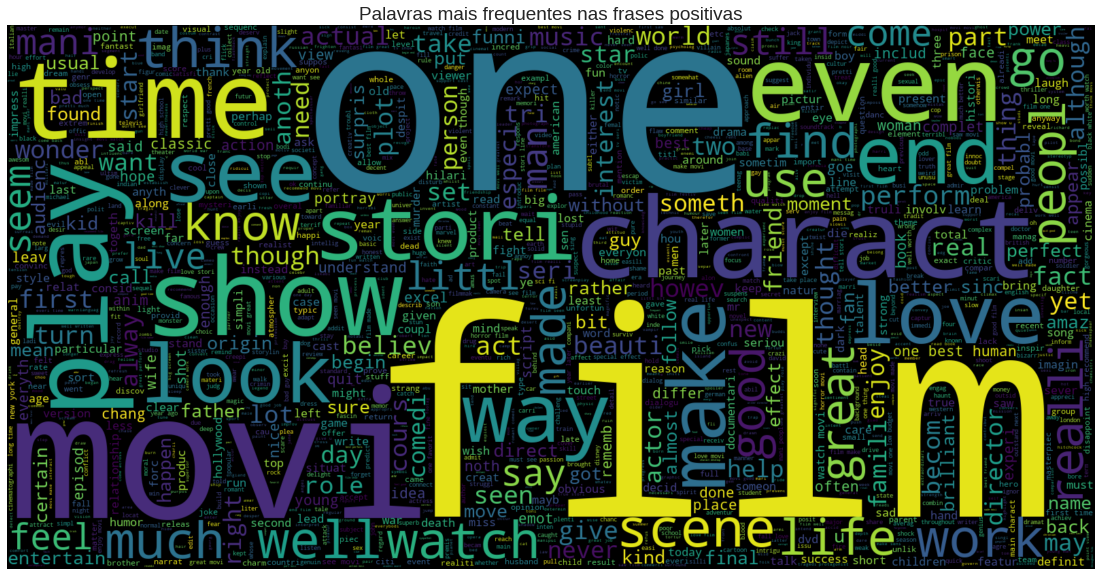

In [ ]:
# Nuvem de palavras da categoria positive
text = ' '.join([word for word in pos_tweets['review']])

wordcloud = WordCloud(max_words=1500, 
                      width=1600, 
                      height=800).generate(text)

plt.figure(figsize=(20.5, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Palavras mais frequentes nas frases positivas', fontsize=19)
plt.show()

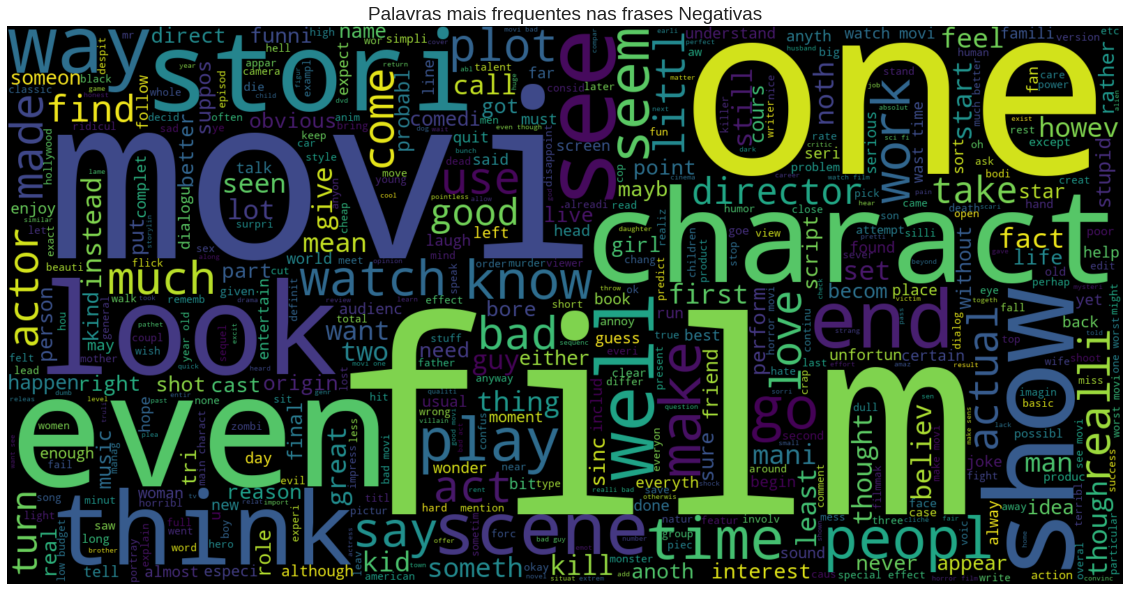

In [ ]:
# Nuvem de palavras da categoria negative
text = ' '.join([word for word in neg_tweets['review']])

plt.figure(figsize=(20,15), facecolor='None')

wordcloud = WordCloud(max_words=500, 
                      width=1600, 
                      height=800).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Palavras mais frequentes nas frases Negativas', fontsize=19)
plt.show()

## Criação do modelo

In [ ]:
# Técnica de bag of words nos permite representar o texto com a ocorrência de cada palavra,
#sem levar em conta a ordem das palavras ou a sua estrutura no texto.
X = np.array(data.iloc[:,0].values)
y = np.array(data.sentiment.values)

cv = CountVectorizer(max_features = 1000)
X = cv.fit_transform(data.review).toarray()

print("X.shape = ",X.shape)
print("y.shape = ",y.shape)

X.shape =  (50000, 1000)
y.shape =  (50000,)


In [ ]:
print(y)

['positive' 'positive' 'positive' ... 'negative' 'negative' 'negative']


In [ ]:
# Base de treino e teste
trainx,testx,trainy,testy = train_test_split(X,y,test_size=0.2,random_state=9)
print("Train shapes : X = {}, y = {}".format(trainx.shape,trainy.shape))
print("Test shapes : X = {}, y = {}".format(testx.shape,testy.shape))

Train shapes : X = (40000, 1000), y = (40000,)
Test shapes : X = (10000, 1000), y = (10000,)


In [ ]:
# Criação e treinamento do modelo (geração da tabela de probabilidades)
gnb= GaussianNB()
gnb.fit(trainx,trainy)

GaussianNB()

In [ ]:
# Predict 
ypm = gnb.predict(testx)

In [ ]:
# Acurácia do modelo
print("Multinomial = ",accuracy_score(testy,ypm))

Multinomial =  0.7843


In [ ]:
#geração da matriz de confusão e cálculo da taxa de acerto e erro
confusao = confusion_matrix(testy, ypm)
confusao

array([[4195,  828],
       [1329, 3648]])

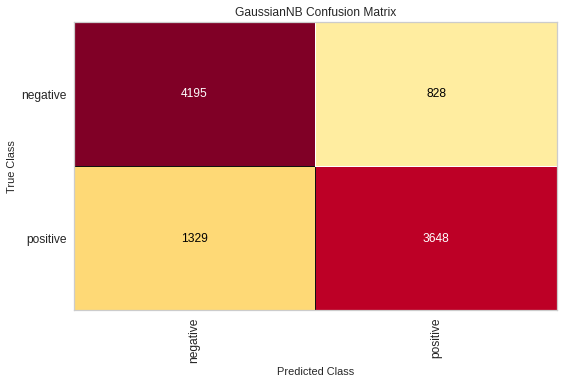

In [ ]:
# Visualização da matriz de confusão
v = ConfusionMatrix(GaussianNB())
v.fit(trainx, trainy)
v.score(testx,testy)
v.poof()

In [ ]:
# Salvando o modelo 
pickle.dump(gnb,open('model1.pkl','wb'))

## Utilizando a modelo

In [ ]:
rev =  """s   a   w       m   o   v   i       1   2       c   a   m   e       r   e   c   a   l       s   c   a   r   i   e   s   t       s   c   e   n   e       b   i   g       b   i   r   d       e   a   t       m   e   n       d   a   n   g   l       h   e   l   p   l   e   s   s       p   a   r   a   c   h   u   t       r   i   g   h   t       a   i   r       h   o   r   r   o   r       h   o   r   r   o   r       y   o   u   n   g       k   i   d       g   o       c   h   e   e   s   i       b       f   i   l   m       s   a   t   u   r   d   a   y       a   f   t   e   r   n   o   o   n       s   t   i   l   l       t   i   r   e       f   o   r   m   u   l   a       m   o   n   s   t   e   r       t   y   p   e       m   o   v   i       u   s   u   a   l       i   n   c   l   u   d       h   e   r   o       b   e   a   u   t   i     
  w   o   m   a   n       m   i   g   h   t       d   a   u   g   h   t   e   r       p   r   o   f   e   s   s   o   r       h   a   p   p   i       r   e"""
f1 = clean(rev)
f2 = is_special(f1)
f3 = to_lower(f2)
f4 = rem_stopwords(f3)
f5 = stem_txt(f4)

bow,words = [],word_tokenize(f5)
for word in words:
    bow.append(words.count(word))

word_dict = cv.vocabulary_
pickle.dump(word_dict,open('bow.pkl','wb'))

inp = []
for i in word_dict:
    inp.append(f5.count(i[0]))
y_pred = gnb.predict(np.array(inp).reshape(1,1000))

In [ ]:
y_pred

array(['negative'], dtype='<U8')